Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [57]:
# imports
import pandas as pd
import sqlite3
from sqlite3 import Error
import seaborn as sns
from scipy import stats

import warnings

# Suppress seaborn and pandas warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [21]:
bike_stations_df = pd.read_csv('bike_stations.csv', index_col = 0)
yelp_business_df = pd.read_csv('yelp_business.csv', index_col = 0)

Join the data from both dataframes on Station Name and drop columns not needed

In [5]:
Business_and_Bike_Stations_df = pd.merge(yelp_business_df, bike_stations_df, on = 'Station Name')
Business_and_Bike_Stations_df = Business_and_Bike_Stations_df.drop(columns=['Latitude', 'Longitude'])

In [6]:
Business_and_Bike_Stations_df['Number of Bikes'] = Business_and_Bike_Stations_df['Available Bikes'] + Business_and_Bike_Stations_df['Empty Slots']
Business_and_Bike_Stations_df

,Station Name,Station Latitude,Station Longitude,Business Category,Business Name,Rating,Number of Reviews,Address,Contact,Available Bikes,Empty Slots,Number of Bikes
0,SE 47th at Hawthorne,45.511950,-122.614160,Mexican,Por Qué No? Taqueria,4.0,1365,4635 SE Hawthorne Blvd,(503) 954-3138,1,2,3
1,SE 47th at Hawthorne,45.511950,-122.614160,Pizza,Apizza Scholls,4.0,1753,4741 SE Hawthorne Blvd,(503) 233-1286,1,2,3
2,SE 47th at Hawthorne,45.511950,-122.614160,Lounges,Sapphire Hotel,4.5,492,5008 SE Hawthorne Blvd,(503) 232-6333,1,2,3
3,SE 47th at Hawthorne,45.511950,-122.614160,Noodles,Baka Umai,4.5,178,4703 SE Hawthorne Blvd,(971) 255-0116,1,2,3
4,SE 47th at Hawthorne,45.511950,-122.614160,Thai,Khao Thai,4.5,73,4604 SE Hawthorne Blvd,(971) 346-2422,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4749,NE 29th Ave (U of O),45.570366,-122.636043,Bakeries,Flour Market,5.0,28,5507 NE 30th Ave,(503) 209-5363,5,1,6
4750,NE 29th Ave (U of O),45.570366,-122.636043,Food Trucks,Honey Butter Country Fare,5.0,26,6719 NE 18th Ave,(503) 209-5363,5,1,6
4751,NE 29th Ave (U of O),45.570366,-122.636043,Coffee & Tea,Kiss Coffee,5.0,37,3016 NE Ainsworth St,(503) 209-5363,5,1,6
4752,NE 29th Ave (U of O),45.570366,-122.636043,Burgers,Bless Your Heart Burgers,4.0,132,5410 NE 33rd Ave,(503) 719-6447,5,1,6


In [7]:
Business_and_Bike_Stations_df.to_csv('Business_and_Bike_Stations.csv')

Using the aggregate argument for summary stats of the dataframe for Business and Bike Stations

Exploratory Data Analysis

In [59]:
grouped_business = Business_and_Bike_Stations_df.groupby('Station Name').agg({
    'Rating': 'mean',
    'Number of Reviews': 'mean',
    'Number of Bikes': 'max'
}).reset_index()

grouped_business = grouped_business.rename(columns={
    'Rating': 'Average Rating',
    'Number of Reviews': 'Average Reviews',
})
grouped_business_df = pd.DataFrame(grouped_business)
print(grouped_business_df)

                        Station Name  Average Rating  Average Reviews  \
0            Broadway Residence Hall        4.175000       572.050000   
1                Casey Eye Institute        4.175000        80.850000   
2              Cleveland High School        4.300000       561.050000   
3                         Cully Park        4.083333        47.111111   
4    Doernbecher Children's Hospital        4.175000        48.750000   
..                               ...             ...              ...   
233      SW Yamhill at Director Park        4.175000      1497.900000   
234                    Shattuck Hall        4.175000       605.500000   
235         Tilikum West at SW Moody        4.025000       285.600000   
236     Urban Center Plaza at SW 6th        4.150000       741.550000   
237        W Burnside at SW Park Ave        4.200000      1707.550000   

     Number of Bikes  
0                  4  
1                  6  
2                  9  
3                 10  
4       

In [9]:
grouped_business_df.to_csv('grouped_business.csv')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [42]:
#The cummulative table has 238 rows, 4 columns
grouped_business_df.shape

(238, 4)

In [43]:
#we have 238 unique bike stations
grouped_business_df['Station Name'].describe()

count                         238
unique                        238
top       Broadway Residence Hall
freq                            1
Name: Station Name, dtype: object

In [44]:
#We have a maximum rating of 4.63 and minimum rating of 3.23, with a mean of 4.22
grouped_business_df['Average Rating'].describe()

count    238.000000
mean       4.218023
std        0.167009
min        3.225000
25%        4.150000
50%        4.250000
75%        4.325000
max        4.625000
Name: Average Rating, dtype: float64

In [47]:
#The maximum number of reviews for a station is 1708 and the minimum number of reviews for a station is 47, with a mean of 572 reviews per station
grouped_business_df['Average Reviews'].describe()

count     238.000000
mean      571.902463
std       425.349184
min        47.111111
25%       219.825000
50%       448.700000
75%       805.100000
max      1707.550000
Name: Average Reviews, dtype: float64

In [48]:
#The maximum number of bikes for a station is 25 and the minimum number of bikes for a station is 1, with a mean of 10 bikes per station
grouped_business_df['Number of Bikes'].describe()

count    238.000000
mean       9.638655
std        5.094435
min        1.000000
25%        5.000000
50%        9.000000
75%       13.000000
max       25.000000
Name: Number of Bikes, dtype: float64

<Axes: xlabel='Number of Bikes', ylabel='Count'>

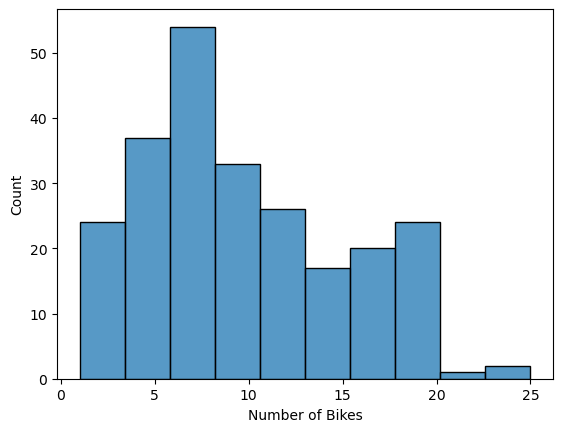

In [49]:
#The distribution is skewed to the right implying that majority of bike stations have less than 20 bikes
sns.histplot(grouped_business_df['Number of Bikes'])

<Axes: xlabel='Average Rating', ylabel='Count'>

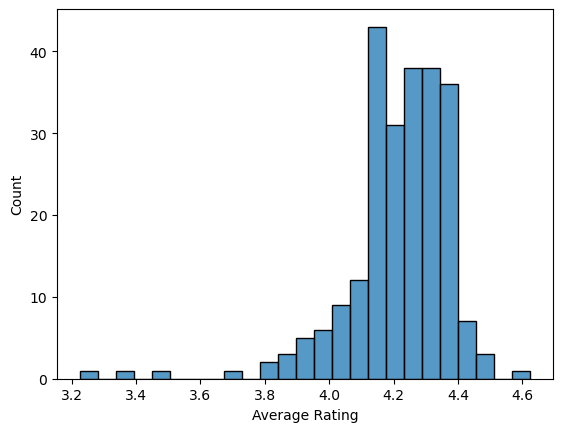

In [51]:
#The data is not normally distributed and skewed to the left impyling that most bike stations have an average rating above 3.8
sns.histplot(grouped_business_df['Average Rating'])

<Axes: xlabel='Average Reviews', ylabel='Count'>

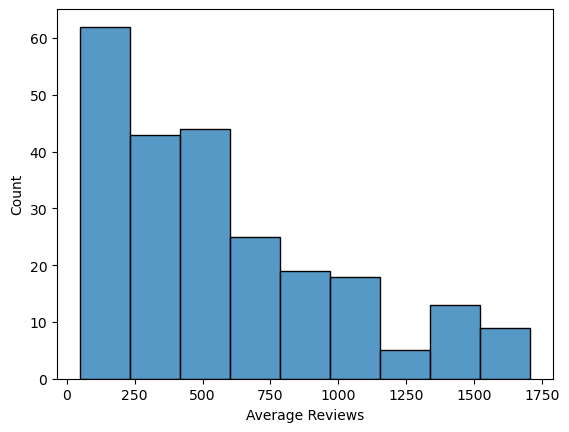

In [53]:
#The data is log-normally distributed.
sns.histplot(grouped_business_df['Average Reviews'])

Data Visualization for Exploratory Data Analysis using Number of Bikes vs Reviews

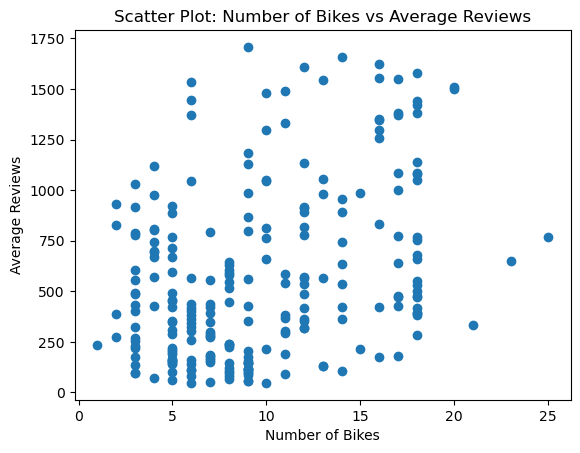

In [54]:
import matplotlib.pyplot as plt

plt.scatter(grouped_business_df['Number of Bikes'], grouped_business_df['Average Reviews'])
plt.title('Scatter Plot: Number of Bikes vs Average Reviews')
plt.xlabel('Number of Bikes')
plt.ylabel('Average Reviews')
plt.show()

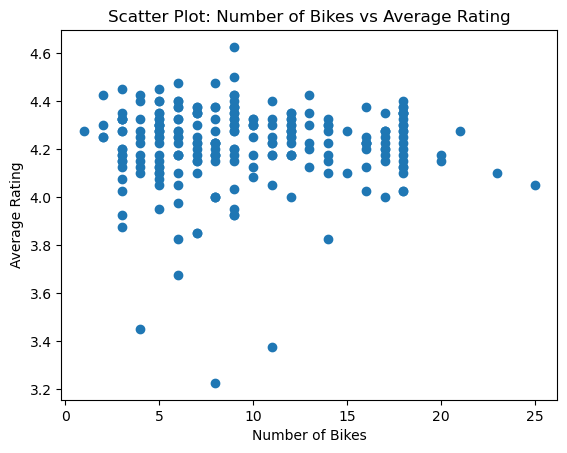

In [55]:
import matplotlib.pyplot as plt

plt.scatter(grouped_business_df['Number of Bikes'], grouped_business_df['Average Rating'])
plt.title('Scatter Plot: Number of Bikes vs Average Rating')
plt.xlabel('Number of Bikes')
plt.ylabel('Average Rating')
plt.show()

From initial interpretation of the scatter plot, we can see a strong positive relationship between number of bikes and the average rating for the bike station with a couple of outliers identified. We observe a week or null relationship between number of bikes and the Average Reviews for the bike stations.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [18]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [19]:
connection = create_connection("Business_and_Bike_Stations.sqlite")
connect = sqlite3.connect('Business_and_Bike_Stations.sqlite')

Connection to SQLite DB successful


In [20]:
table_name = 'Business_and_Bike_Stations'
Business_and_Bike_Stations_df.to_sql(table_name, connect, if_exists='replace', index=False)

4754

importing bike stations and yelp business tables to SQL

In [22]:
table_name = 'Bike_Stations'
bike_stations_df.to_sql(table_name, connect, if_exists='replace', index=False)

238

In [23]:
table_name = 'yelp_business'
yelp_business_df.to_sql(table_name, connect, if_exists='replace', index=False)

4754

Look at the data before and after the join to validate your data.

Using SQL for data audit to validate the results to verify that yelp_business and bike_stations data is found in merged business_and_bike_stations table

Verifying bike stations table

In [29]:
# Connect to the SQLite database
cursor = connection.cursor()

# Execute a query to get the number of rows and columns in Bike Stations
query = "PRAGMA table_info('Bike_Stations');"
cursor.execute(query)

# Fetch all the rows from the result set
columns_info = cursor.fetchall()

# Get the number of rows and columns (entries in the table)
query = "SELECT COUNT(*) FROM 'Bike_Stations';"
cursor.execute(query)
num_rows = cursor.fetchone()[0]
num_columns = len(columns_info)

In [30]:
#print the result
print(f"Number of rows in 'Bike Stations': {num_rows}")
print(f"Number of columns in 'Bike Stations': {num_columns}")

Number of rows in 'Bike Stations': 238
Number of columns in 'Bike Stations': 5


Verifying Yelp Business table

In [31]:
# Connect to the SQLite database
cursor = connection.cursor()

# Execute a query to get the number of rows and columns in Bike Stations
query = "PRAGMA table_info('yelp_business');"
cursor.execute(query)

# Fetch all the rows from the result set
columns_info = cursor.fetchall()

# Get the number of rows and columns (entries in the table)
query = "SELECT COUNT(*) FROM 'yelp_business';"
cursor.execute(query)
num_rows = cursor.fetchone()[0]
num_columns = len(columns_info)

In [32]:
#print the result
print(f"Number of rows in 'yelp_business': {num_rows}")
print(f"Number of columns in 'yelp_business': {num_columns}")

Number of rows in 'yelp_business': 4754
Number of columns in 'yelp_business': 9


Verifying Business_and_Bike_Stations table 

In [33]:
# Connect to the SQLite database
cursor = connection.cursor()

# Execute a query to get the number of rows and columns in Business and Bike Stations
query = "PRAGMA table_info('Business_and_Bike_Stations');"
cursor.execute(query)

# Fetch all the rows from the result set
columns_info = cursor.fetchall()

# Get the number of rows and columns (entries in the table)
query = "SELECT COUNT(*) FROM 'Business_and_Bike_Stations';"
cursor.execute(query)
num_rows = cursor.fetchone()[0]
num_columns = len(columns_info)

In [35]:
#print the result to validate that data tables are found in Business_and_Bike_Station
print(f"Number of rows in 'Business_and_Bike_Station': {num_rows}")
print(f"Number of columns in 'Business_and_Bike_Station': {num_columns}")

Number of rows in 'Business_and_Bike_Station': 4754
Number of columns in 'Business_and_Bike_Station': 12


In [36]:
connect.commit()
connect.close()